[Reference](https://medium.com/@aserdargun/feature-engineering-for-time-series-forecasting-2-cfab73157ead)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context("talk")

# Load retail sales dataset
df = pd.read_csv(
    "../Datasets/example_retail_sales.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)
df.head()

fig, ax = plt.subplots(figsize=[10, 5])
ax = df.plot(y="y", marker=".", figsize=[10, 5], legend=None, ax=ax)
ax.set_title('Retail sales')
ax.set_ylabel('Sales')
ax.set_xlabel('Time')

df_ = df.copy()  # Create a copy to preserve the original dataframe
                 # for later use.

lag = 2  # As the time series is uniformly spaced by months we can
         # specify the lag in terms of the number of periods. In
         # this case the period is in unit of months.

df_[f"y_lag_{lag}"] = df_["y"].shift(periods=lag)
df_.head()

df_ = df.copy()  # Create a copy to preserve the original dataframe
                 # for later use

lag = 2  # As the time series is uniformly spaced by months we can
         # specify the lag in terms of the number of periods. In
         # this case the period is in unit of months.

df_[f"y_lag_{lag}"] = df_["y"].shift(periods=lag, freq="MS")
df_.head()

from feature_engine.timeseries.forecasting import LagFeatures

lag_transformer = LagFeatures(variables=["y"], freq=["1MS", "2MS", "3MS"])
lag_transformer.fit_transform(df)

In [6]:
import pandas as pd
import numpy as np
# Initial parameters
num_timesteps = 1000 # Length of time series we want
phi = 0.9
c = 0
ts = pd.date_range(start="2000-01-01", periods=num_timesteps, freq="D")

# Generate time series
y = np.zeros(num_timesteps)
for t in range(1, num_timesteps):
    noise = np.random.normal()
y[t] = c + phi * y[t - 1] + noise

AR1 = pd.DataFrame(data={"y": y}, index=ts)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context("talk")

In [8]:
num_timesteps = 300  # Length of time series we want.
np.random.seed(0)  # Ensures we generate the same random numbers every time.

y = np.random.normal(loc=0, scale=1, size=num_timesteps)
ts = pd.date_range(start="2000-01-01", periods=num_timesteps, freq="D")

df = pd.DataFrame(data={"y": y}, index=ts)
df.head()

,y
2000-01-01,1.764052
2000-01-02,0.400157
2000-01-03,0.978738
2000-01-04,2.240893
2000-01-05,1.867558


Text(0.5, 0, 'Time')

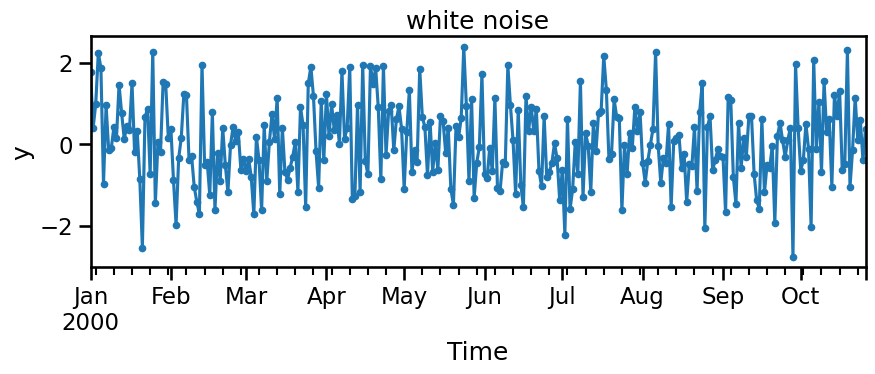

In [9]:
ax = df.plot(figsize=[10, 3], legend=None, marker=".")
ax.set_title("white noise")
ax.set_ylabel("y")
ax.set_xlabel("Time")

Text(0.5, 1.0, 'Lag plot with lag 1')

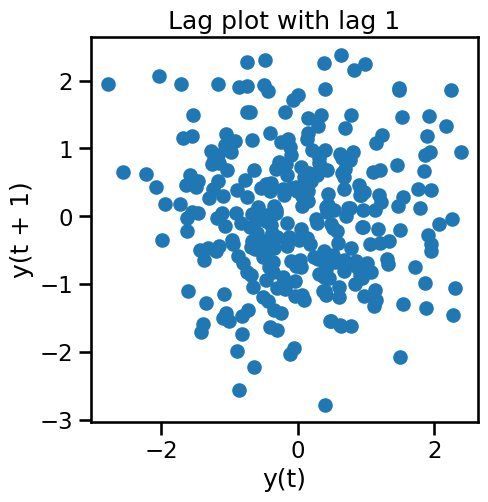

In [10]:
fig, ax = plt.subplots(figsize=[5, 5])
ax = pd.plotting.lag_plot(df["y"], lag=1, ax=ax)
ax.set_title("Lag plot with lag 1")

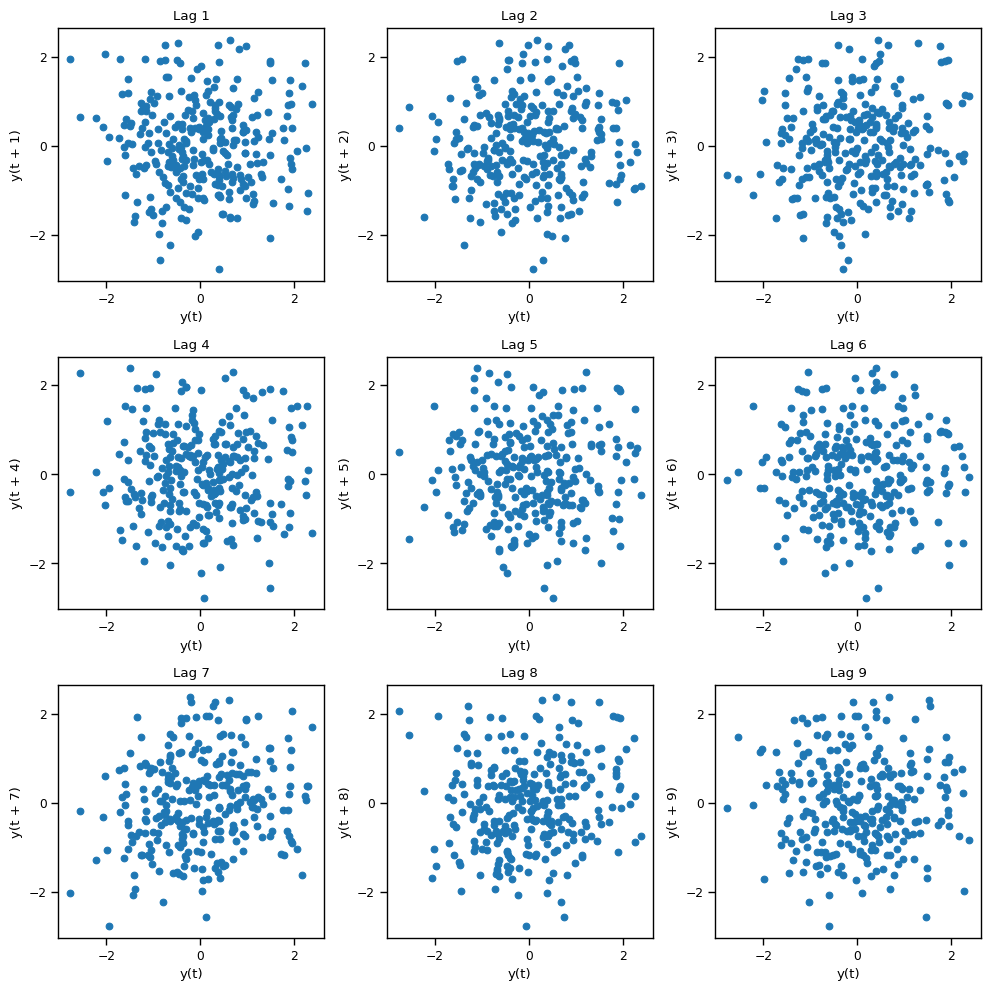

In [11]:
with sns.plotting_context("paper"): # Sets the plotting format for these specific plots.
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=[10, 10])
    for i, ax_ in enumerate(ax.flatten()):
        pd.plotting.lag_plot(df["y"], lag=i + 1, ax=ax_)
        ax_.set_title(f"Lag {i+1}")
        ax_.ticklabel_format(style="sci", scilimits=(0, 0))
    plt.tight_layout()